In [1]:
%matplotlib inline
from utils import *
from data_processing import Data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

locator = mdates.AutoDateLocator()

In [2]:
def smooth(y, deg=15, x=None):
    if(x is None):
        xp = [i for i in range(len(y))]
    else:
        xp = x
    poly = np.poly1d(np.polyfit(xp, y, deg))
    yp = poly(xp)
    return xp, yp

In [3]:
# data
data = Data(fname="data/data.csv", use_dummies=False, normalize=False)
# data = Data(use_dummies=False, normalize=False)
X_df, y_df = data.processing(["adr", "actual_adr", "revenue", "is_canceled"])
df = pd.concat([X_df, y_df], axis=1)
true_df = data.to_label(df, ["adr", "revenue", "label", "arrival_date_year", "orders_in_the_same_day", "avg_adr", "avg_revenue"])

Shape of Read Train Data: (119390, 32)
Shape of Read Label Data: (640, 1)
Shape of Read Test Data: (27859, 28)
New added columns: ['revenue', 'actual_adr', 'net_canceled']
---------------
Processing file: data/data.csv
Columns that contain NaN (before):
 ['country', 'agent', 'company']
Columns that contain NaN (after):
 []
Excluded columns: ['is_canceled', 'adr', 'reservation_status', 'reservation_status_date', 'revenue', 'actual_adr']
Processed DataFrame shape: (119390, 29)
hotel 0
meal 0
country 106
market_segment 6
distribution_channel 3
reserved_room_type 0
assigned_room_type 0
deposit_type 0
agent 157
company 70
customer_type 2


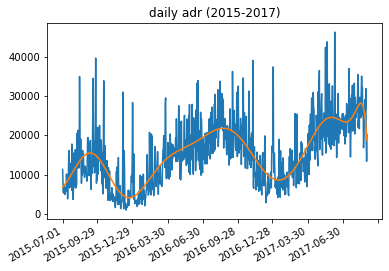

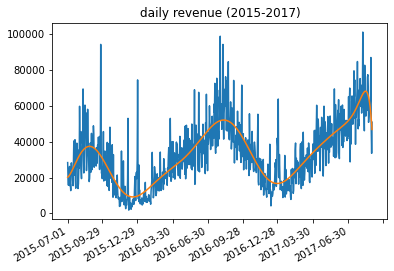

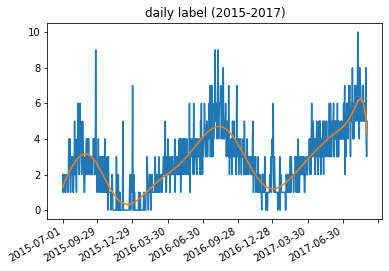

In [4]:
plt.figure()
plt.title("daily adr (2015-2017)")
smooth_x, smooth_y = smooth(true_df["adr"].to_numpy(), 15)
plt.plot(true_df["adr"])
plt.plot(smooth_x, smooth_y)

plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()
plt.show()

plt.figure()
plt.title("daily revenue (2015-2017)")
smooth_x, smooth_y = smooth(true_df["revenue"].to_numpy(), 15)
plt.plot(true_df["revenue"])
plt.plot(smooth_x, smooth_y)
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()

plt.figure()
plt.title("daily label (2015-2017)")
smooth_x, smooth_y = smooth(true_df["label"].to_numpy(), 15)
plt.plot(true_df["label"])
plt.plot(smooth_x, smooth_y)
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()

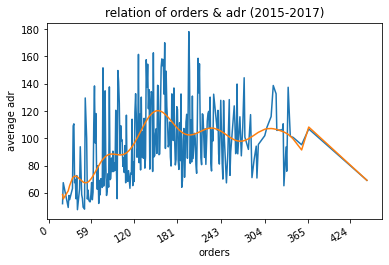

In [5]:
sorted_true_df = true_df.sort_values(by=["orders_in_the_same_day"])
orders = sorted_true_df["orders_in_the_same_day"].to_numpy()
adrs = sorted_true_df["avg_adr"].to_numpy()

orders_adr = {}
for order, adr in zip(orders, adrs):
    orders_adr[order] = orders_adr.get(order, [adr])

x, y = [], []
for order, adrs in orders_adr.items():
    x.append(order)
    y.append(sum(adrs) / len(adrs))

plt.figure()
plt.title("relation of orders & adr (2015-2017)")
smooth_x, smooth_y = smooth(y, 15, x=x)
plt.plot(x, y)
plt.plot(smooth_x, smooth_y)
plt.xlabel("orders")
plt.ylabel("average adr")
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()

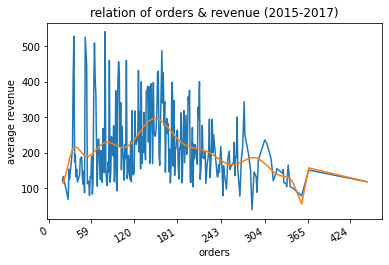

In [6]:
sorted_true_df = true_df.sort_values(by=["orders_in_the_same_day"])
orders = sorted_true_df["orders_in_the_same_day"].to_numpy()
revenues = sorted_true_df["avg_revenue"].to_numpy()

orders_revenue = {}
for order, revenue in zip(orders, revenues):
    orders_revenue[order] = orders_revenue.get(order, [revenue])

x, y = [], []
for order, revenues in orders_revenue.items():
    x.append(order)
    y.append(sum(revenues) / len(revenues))

plt.figure()
plt.title("relation of orders & revenue (2015-2017)")
smooth_x, smooth_y = smooth(y, 15, x=x)
plt.plot(x, y)
plt.plot(smooth_x, smooth_y)
plt.xlabel("orders")
plt.ylabel("average revenue")
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()

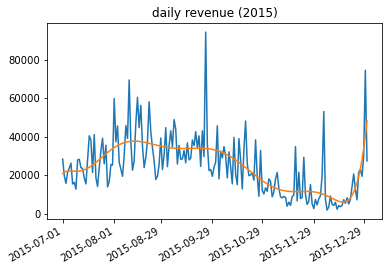

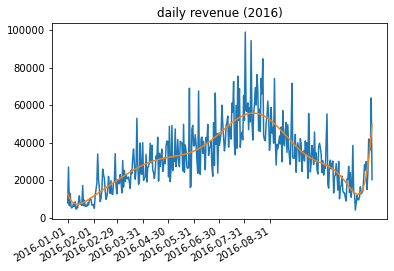

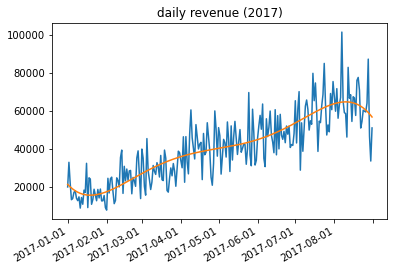

In [7]:
revenue_2015 = true_df.loc[true_df["arrival_date_year"] == 2015, "revenue"]
revenue_2016 = true_df.loc[true_df["arrival_date_year"] == 2016, "revenue"]
revenue_2017 = true_df.loc[true_df["arrival_date_year"] == 2017, "revenue"]

plt.figure()
plt.title("daily revenue (2015)")
smooth_x_2015, smooth_y_2015 = smooth(revenue_2015.to_numpy(), 10)
plt.plot(revenue_2015)
plt.plot(smooth_x_2015, smooth_y_2015)
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()


plt.figure()
plt.title("daily revenue (2016)")
smooth_x_2016, smooth_y_2016 = smooth(revenue_2016.to_numpy(), 10)
plt.plot(revenue_2016)
plt.plot(smooth_x_2016, smooth_y_2016)
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()

plt.figure()
plt.title("daily revenue (2017)")
smooth_x_2017, smooth_y_2017 = smooth(revenue_2017.to_numpy(), 5)
plt.plot(revenue_2017)
plt.plot(smooth_x_2017, smooth_y_2017)
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()

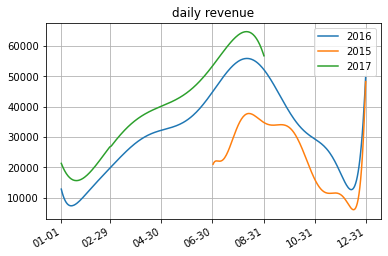

In [8]:
plt.figure()
plt.title("daily revenue")
plt.plot(revenue_2016.index.str[5:], smooth_y_2016, label="2016")
plt.plot(revenue_2015.index.str[5:], smooth_y_2015, label="2015")
plt.plot(revenue_2017.index.str[5:], smooth_y_2017, label="2017")
plt.legend()
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()
plt.grid(True)

In [9]:
date_2015_2016 = []
date_2016_2017 = []
adr_diff = {"2015-2016": [], "2016-2017": [], "2015-2017": []}
revenue_diff = {"2015-2016": [], "2016-2017": [], "2015-2017": []}
label_diff = {"2015-2016": [], "2016-2017": [], "2015-2017": []}
for idx, value in true_df[["revenue"]].iterrows():
    if idx.split("-")[0] == "2015":
        idx_2016 = idx.replace("2015", "2016")
        if idx_2016 in true_df.index:
            diff = true_df.loc[idx_2016] - true_df.loc[idx]
            adr_diff["2015-2016"].append(diff["avg_adr"])
            label_diff["2015-2016"].append(diff["label"])
            revenue_diff["2015-2016"].append(diff["revenue"])
            date_2015_2016.append(idx_2016[5:])
    elif idx.split("-")[0] == "2016":
        idx_2017 = idx.replace("2016", "2017")
        if idx_2017 in true_df.index:
            diff = true_df.loc[idx_2017] - true_df.loc[idx]
            adr_diff["2016-2017"].append(diff["avg_adr"])
            label_diff["2016-2017"].append(diff["label"])
            revenue_diff["2016-2017"].append(diff["revenue"])
            date_2016_2017.append(idx_2017[5:])

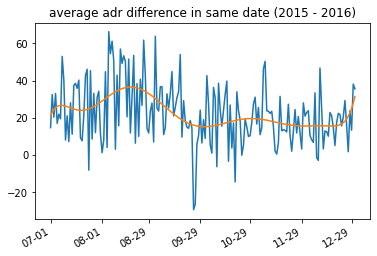

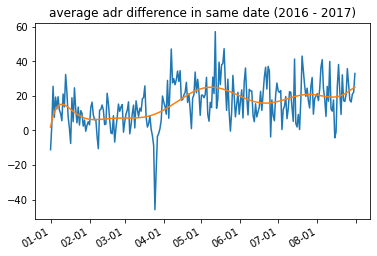

In [10]:
plt.figure()
plt.title("average adr difference in same date (2015 - 2016)")
smooth_x, smooth_y = smooth(adr_diff["2015-2016"], 10)
plt.plot(adr_diff["2015-2016"])
plt.plot(date_2015_2016, smooth_y)
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()

plt.figure()
plt.title("average adr difference in same date (2016 - 2017)")
smooth_x, smooth_y = smooth(adr_diff["2016-2017"], 10)
plt.plot(adr_diff["2016-2017"])
plt.plot(date_2016_2017, smooth_y)
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()

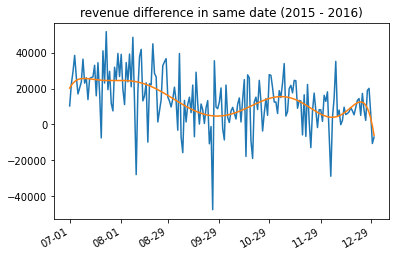

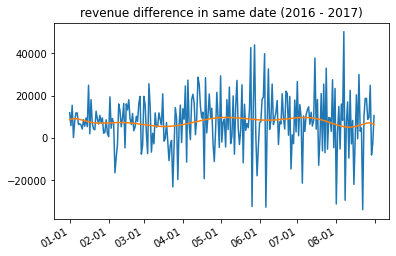

In [11]:
plt.figure()
plt.title("revenue difference in same date (2015 - 2016)")
smooth_x, smooth_y = smooth(revenue_diff["2015-2016"], 10)
plt.plot(revenue_diff["2015-2016"])
plt.plot(date_2015_2016, smooth_y)
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()

plt.figure()
plt.title("revenue difference in same date (2016 - 2017)")
smooth_x, smooth_y = smooth(revenue_diff["2016-2017"], 10)
plt.plot(revenue_diff["2016-2017"])
plt.plot(date_2016_2017, smooth_y)
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()

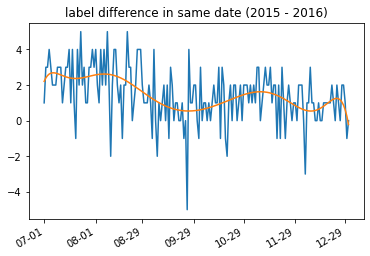

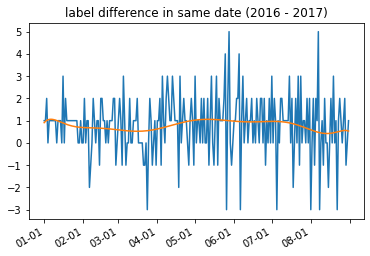

In [12]:
plt.figure()
plt.title("label difference in same date (2015 - 2016)")
smooth_x, smooth_y = smooth(label_diff["2015-2016"], 10)
plt.plot(label_diff["2015-2016"])
plt.plot(date_2015_2016, smooth_y)
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()

plt.figure()
plt.title("label difference in same date (2016 - 2017)")
smooth_x, smooth_y = smooth(label_diff["2016-2017"], 10)
plt.plot(label_diff["2016-2017"])
plt.plot(date_2016_2017, smooth_y)
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()

In [13]:
def show_year_label_count(year):
    df = pd.concat([X_df, y_df], axis=1)
    df = (
        df.groupby(["arrival_date_year", "arrival_date_month", "arrival_date_day_of_month"])
        .sum()
        .reset_index()
    )
    
    df["label"] = df["revenue"] // 10000
    label_count = df.loc[df["arrival_date_year"] == year, "label"].value_counts()

    x, y = [], []
    for idx, value in label_count.items():
        x.append(idx)
        y.append(value)

    plt.figure()
    plt.title(f"label count in {year} (total: {sum(y)})")
    plt.bar(x, y)

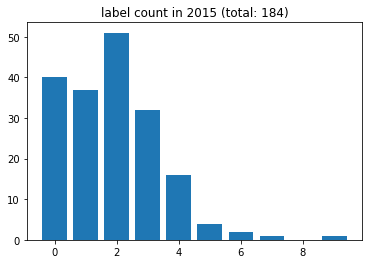

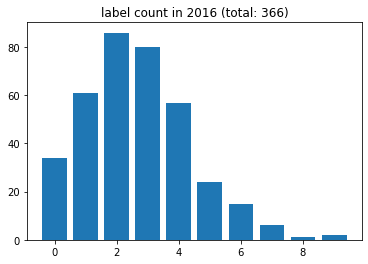

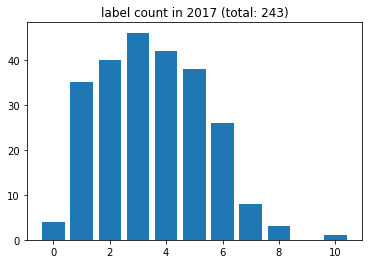

In [14]:
show_year_label_count(2015)
show_year_label_count(2016)
show_year_label_count(2017)

In [15]:
df = pd.concat([X_df, y_df], axis=1)

similar_df = df.groupby(
    [
        "arrival_date_month",
        "arrival_date_day_of_month",
        "lead_time",
        "adults",
        "children",
        "babies",
        "is_repeated_guest",
        "reserved_room_type",
        "assigned_room_type",
        # "is_canceled",
        "hotel",
    ]
)
# for idx, value in similar_df:
#     if value.shape[0] > 1:
#         print(value[["arrival_date_year", "adr"]])
